## 전체 현황 파악

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
import seaborn as sns
import pickle
with open('df_corr_merge.pkl', 'rb') as f:
    df_corr_merge = pickle.load(f)

In [2]:
for c in df_corr_merge.columns:
    if ('서울' or 'x') in c:
        print(c)

서울[호]_x
서울[2017.11=100]
종합-서울[2017.11=100]
아파트-서울[2017.11=100]
연립다세대-서울[2017.11=100]
단독주택-서울[2017.11=100]
서울[호]_y
아파트(서울)[2019.01=100]_x
총지수(서울)[2019.01=100]_x
아파트(서울)[2019.01=100]_y
총지수(서울)[2019.01=100]_y
서울[%]


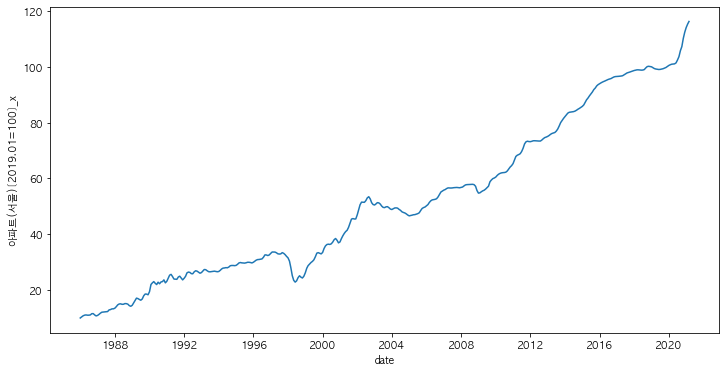

In [3]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='아파트(서울)[2019.01=100]_x', data=df_corr_merge)
plt.show()

In [4]:
# df_corr_merge.to_csv('df_corr_merge.csv')

In [5]:
with open('li_pos.pkl', 'rb') as f:
    li_pos = pickle.load(f)
    
with open('li_neg.pkl', 'rb') as f:
    li_neg = pickle.load(f)

In [6]:
print(li_pos, '\n\n', li_neg)

['선행종합지수(2015=100)' '아파트(서울)[2019.01=100]_x' '아파트[2019.01=100]_x'
 '총지수[2019.01=100]_x' '광주[2017.11=100]' '연립주택[2019.01=100]_x'
 '총지수(서울)[2019.01=100]_x' '지방광역시[2017.11=100]' '아파트[2019.01=100]_y'
 '전국[2017.11=100]'] 

 ['단독주택-5대광역시[2017.11=100]' '단독주택-울산[2017.11=100]' '단독주택-부산[2017.11=100]'
 '단독주택-6대광역시[2017.11=100]' '연립다세대-세종[2017.11=100]' '연립다세대-충북[2017.11=100]'
 '단독주택-지방[2017.11=100]' '연립다세대-충남[2017.11=100]' '아파트-경북[2017.11=100]'
 '종합-경북[2017.11=100]']


In [10]:
import datetime as dt

In [11]:
df_line = pd.DataFrame(df_corr_merge[df_corr_merge.index > dt.datetime(1989,12, 1)], columns=li_pos)

In [12]:
df_line.head()

,선행종합지수(2015=100),아파트(서울)[2019.01=100]_x,아파트[2019.01=100]_x,총지수[2019.01=100]_x,광주[2017.11=100],연립주택[2019.01=100]_x,총지수(서울)[2019.01=100]_x,지방광역시[2017.11=100],아파트[2019.01=100]_y,전국[2017.11=100]
date,,,,,,,,,,
1990-01-01,27.8,19.238,20.529,30.329,NaN,31.006,28.600,NaN,32.174,NaN
1990-02-01,28.0,21.809,22.800,33.942,NaN,35.354,32.730,NaN,33.758,NaN
1990-03-01,28.1,22.371,23.390,34.740,NaN,36.500,33.470,NaN,34.917,NaN
1990-04-01,28.3,22.844,24.013,35.538,NaN,37.742,34.133,NaN,36.577,NaN
1990-05-01,28.4,22.253,23.795,35.202,NaN,37.313,33.198,NaN,37.234,NaN


- x는 주택전세가격지수(KB) 임.

In [13]:
df_line.shape

(375, 10)

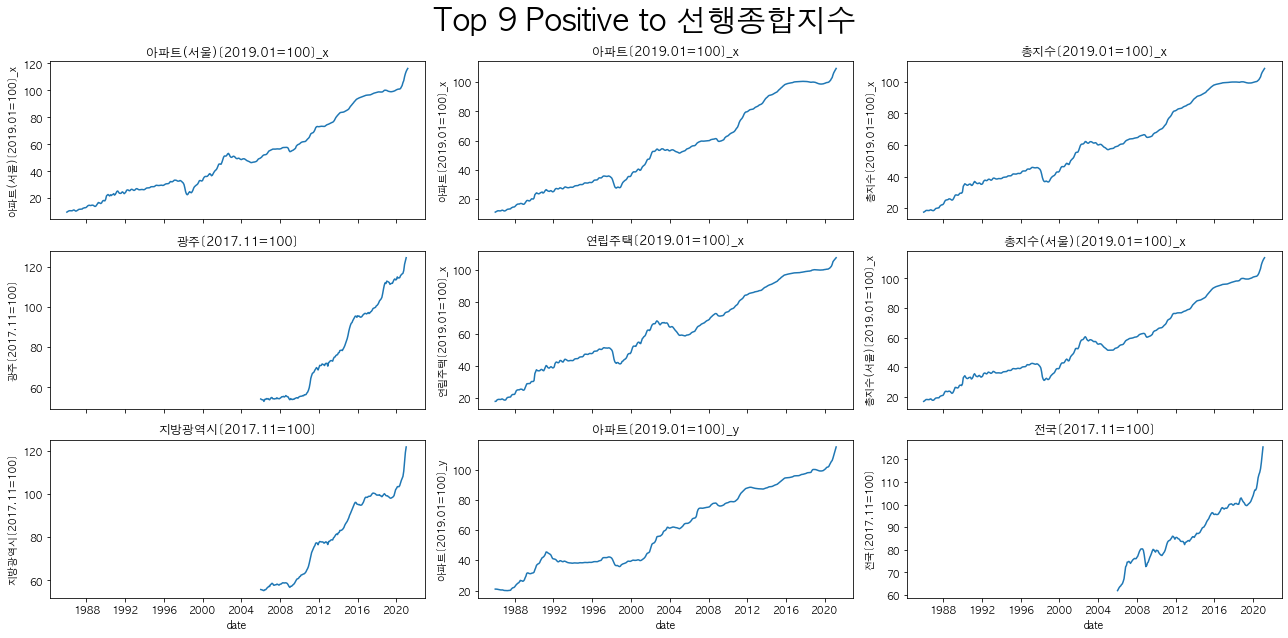

In [14]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(18,9))
l = 1

for i in range(0, 3):
    for j in range(0, 3):
        fig.suptitle('Top 9 Positive to 선행종합지수', fontsize=30)
        sns.lineplot(x='date', y=li_pos[l], data=df_corr_merge, ax=axes[i, j])
        axes[i, j].set_title(li_pos[l])
        l += 1

plt.tight_layout()
plt.show()

In [15]:
li_pos

array(['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x', '아파트[2019.01=100]_x',
       '총지수[2019.01=100]_x', '광주[2017.11=100]', '연립주택[2019.01=100]_x',
       '총지수(서울)[2019.01=100]_x', '지방광역시[2017.11=100]',
       '아파트[2019.01=100]_y', '전국[2017.11=100]'], dtype=object)

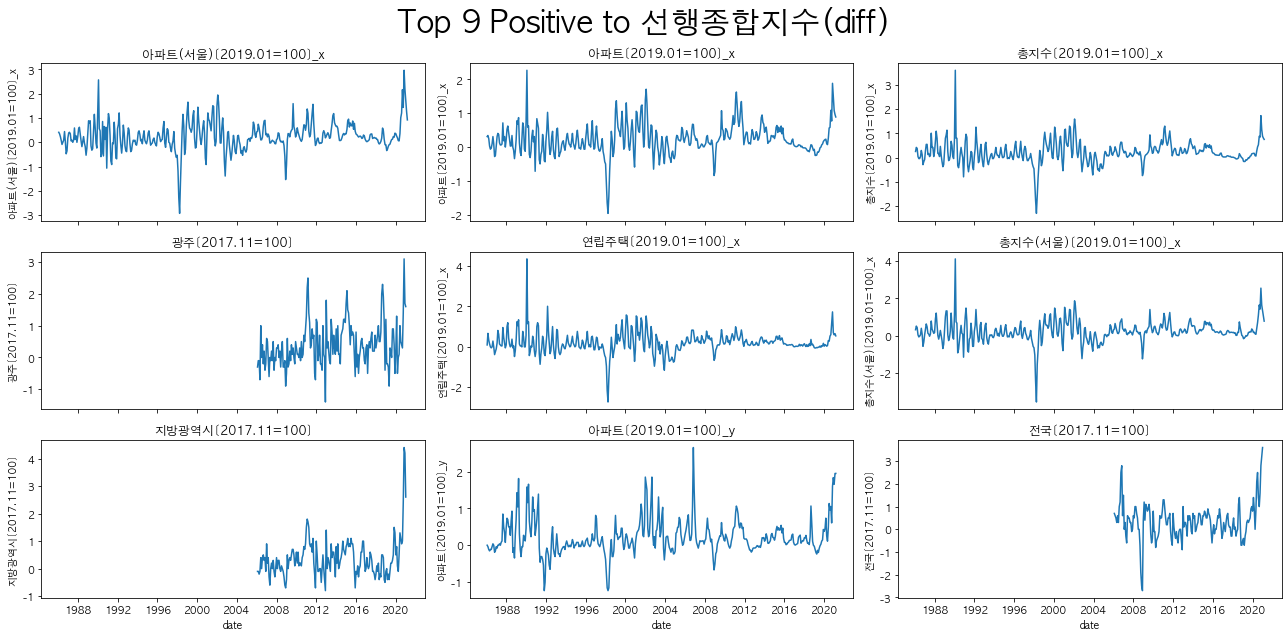

In [16]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(18,9))
l = 1

for i in range(0, 3):
    for j in range(0, 3):
        fig.suptitle('Top 9 Positive to 선행종합지수(diff)', fontsize=30)
        sns.lineplot(x='date', y=df_corr_merge[li_pos[l]].diff(periods=1).iloc[1:], data=df_corr_merge, ax=axes[i, j])
        axes[i, j].set_title(li_pos[l])
        l += 1

plt.tight_layout()
plt.show()

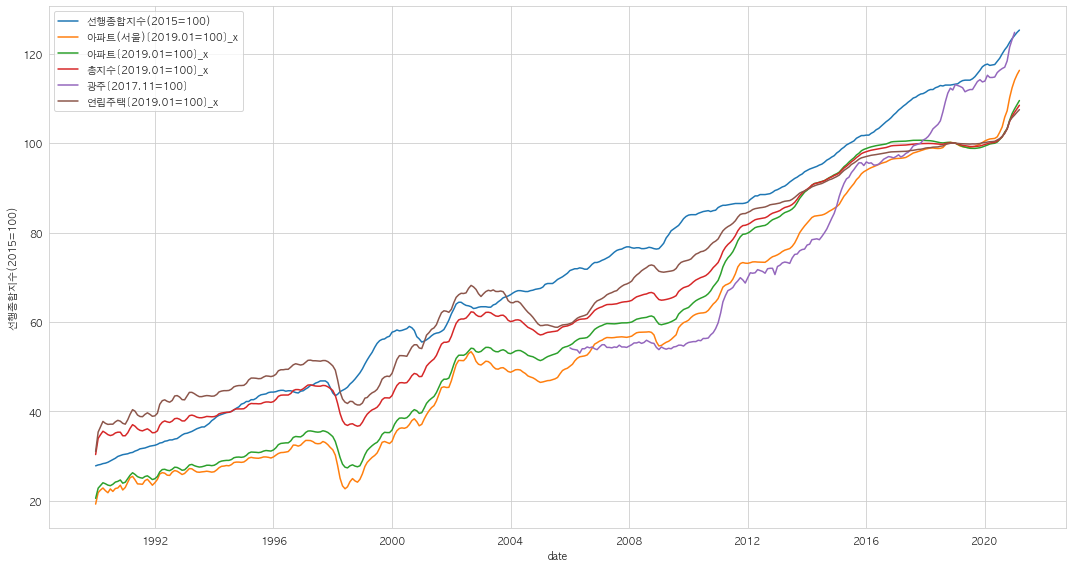

In [172]:
fig = plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = df_line.columns
for i in df_line.columns[:6]:
    sns.lineplot(x='date', y=i, data=df_line)
plt.tight_layout()
plt.legend(labels=labels, loc='upper left')
# plt.title('선행종합지수와 상관계수 Top 5', fontsize=30)
plt.show()

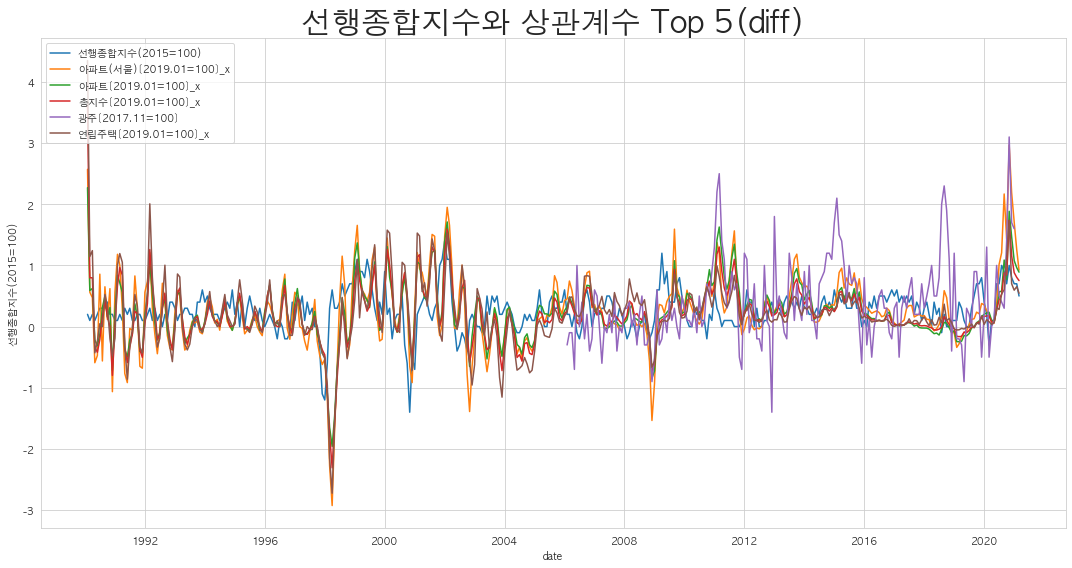

In [18]:
fig = plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = df_line.columns
for i in df_line.columns[:6]:
    sns.lineplot(x='date', y=df_line[i].diff(periods=1).iloc[1:], data=df_line)
plt.title('선행종합지수와 상관계수 Top 5(diff)', fontsize=30)
plt.tight_layout()
plt.legend(labels=labels, loc='upper left')
plt.show()

1999-02-01  :  1.1000000000000014
1999-06-01  :  1.0999999999999943
2001-12-01  :  1.1000000000000014
2002-01-01  :  1.3999999999999986
2002-02-01  :  1.1000000000000014
2002-03-01  :  1.1000000000000014
2009-04-01  :  1.2000000000000028


1997-12-01  :  -1.1000000000000014
1998-01-01  :  -1.1999999999999957
2000-11-01  :  -1.3999999999999986


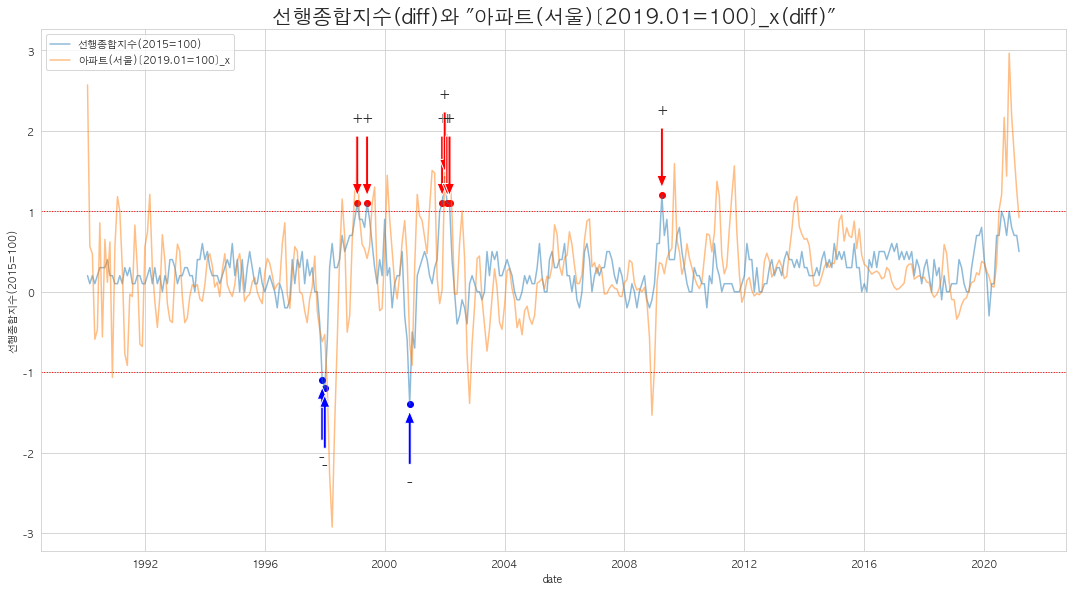

In [19]:
fig = plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = df_line.columns
markevery = df_line.index[df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[:] > 1].tolist()
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=df_line[i].diff(periods=1).iloc[1:], data=df_line, alpha=0.5)
    
for j in range(len(df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[1:])):
    if df_line['선행종합지수(2015=100)'].diff(periods=1)[j] > 1:
        print(dt.datetime.date(df_line.index[j]), " : ", df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j])
        plt.scatter(x=df_line.index[j], y=df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j], data=df_line, color='r')
        plt.annotate('+', xy=(dt.datetime.date(df_line.index[j]), df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j]), 
                     xytext=(df_line.index[j], df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j]+1),
                     fontsize=14, ha='center',
                     arrowprops=dict(facecolor='red', width=3, shrink=0.1, headwidth=10))
print('\n')
for j in range(len(df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[1:])):
    if df_line['선행종합지수(2015=100)'].diff(periods=1)[j] < -1:
        print(dt.datetime.date(df_line.index[j]), " : ", df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j])
        plt.scatter(x=df_line.index[j], y=df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j], data=df_line, color='b')
        plt.annotate('-', xy=(dt.datetime.date(df_line.index[j]), df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j]), 
                     xytext=(df_line.index[j], df_line['선행종합지수(2015=100)'].diff(periods=1).iloc[j]-1),
                     fontsize=14, ha='center',
                     arrowprops=dict(facecolor='blue', width=3, shrink=0.1, headwidth=10))
    
plt.tight_layout()
plt.title('선행종합지수(diff)와 "아파트(서울)[2019.01=100]_x(diff)"', fontsize=20)
plt.axhline(y=1, color='r', linewidth=1, linestyle=':')
plt.axhline(y=-1, color='r', linewidth=1, linestyle=':')
plt.legend(labels=labels[:2], loc='upper left')
plt.show()

1990-02-01 : 2.57
1999-02-01 : 1.65
2001-08-01 : 1.51
2002-02-01 : 1.95
2002-03-01 : 1.66
2009-09-01 : 1.59
2011-09-01 : 1.56
2020-09-01 : 2.17
2020-11-01 : 2.97
2020-12-01 : 2.19
2021-01-01 : 1.71


1990-12-01 : -1.06
1998-02-01 : -1.18
1998-03-01 : -2.27
1998-04-01 : -2.93
1998-05-01 : -1.68
2002-11-01 : -1.39
2008-12-01 : -1.54


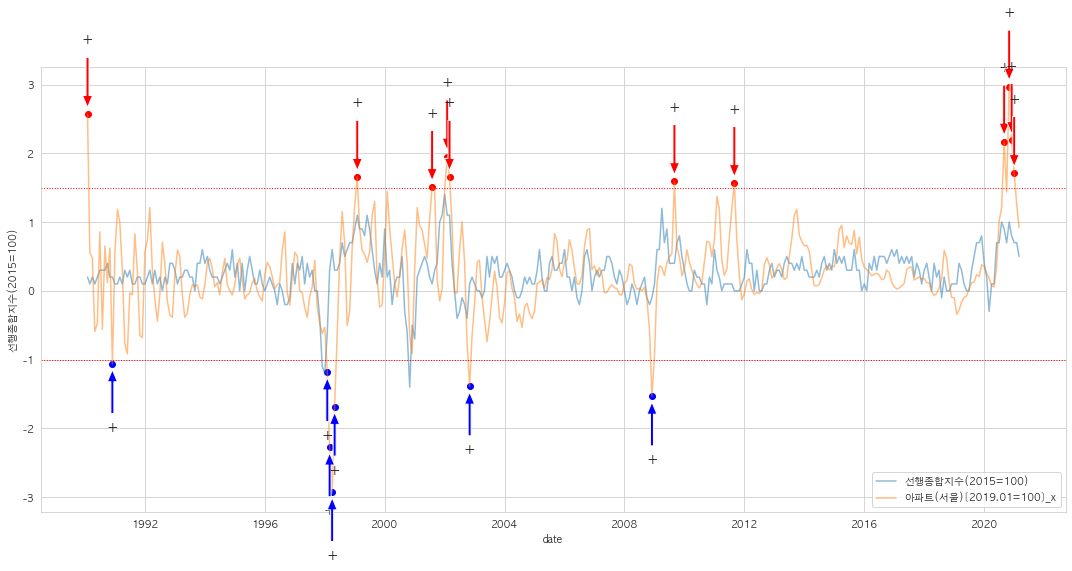

In [174]:
fig = plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = df_line.columns

for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=df_line[i].diff(periods=1).iloc[1:], data=df_line, alpha=0.5)
    
for j in range(len(df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[1:])):
    if df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1)[j] > 1.5:
        print(f"{dt.datetime.date(df_line.index[j])} : {df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j]:0.2f}")
        plt.scatter(x=df_line.index[j], y=df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j], data=df_line, color='r')
        plt.annotate('+', xy=(dt.datetime.date(df_line.index[j]), df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j]), 
                     xytext=(df_line.index[j], df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j]+1),
                     fontsize=14, ha='center',
                     arrowprops=dict(facecolor='red', width=3, shrink=0.1, headwidth=10))
print('\n')
for j in range(len(df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[1:])):
    if df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1)[j] < -1:
        print(f"{dt.datetime.date(df_line.index[j])} : {df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j]:0.2f}")
        plt.scatter(x=df_line.index[j], y=df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j], data=df_line, color='b')
        plt.annotate('+', xy=(dt.datetime.date(df_line.index[j]), df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j]), 
                     xytext=(df_line.index[j], df_line['아파트(서울)[2019.01=100]_x'].diff(periods=1).iloc[j]-1),
                     fontsize=14, ha='center',
                     arrowprops=dict(facecolor='blue', width=3, shrink=0.1, headwidth=10))
    
plt.tight_layout()
# plt.title('선행종합지수(diff)와 "아파트(서울)[2019.01=100]_x(diff)"', fontsize=20)
plt.axhline(y=1.5, color='r', linewidth=1, linestyle=':')
plt.axhline(y=-1, color='r', linewidth=1, linestyle=':')
plt.legend(labels=labels[:2], loc='lower right')
plt.show()

In [21]:
df_line_diff = df_line.diff(periods=1)

In [22]:
df_line_diff.head()

,선행종합지수(2015=100),아파트(서울)[2019.01=100]_x,아파트[2019.01=100]_x,총지수[2019.01=100]_x,광주[2017.11=100],연립주택[2019.01=100]_x,총지수(서울)[2019.01=100]_x,지방광역시[2017.11=100],아파트[2019.01=100]_y,전국[2017.11=100]
date,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-01,0.2,2.571,2.271,3.613,NaN,4.348,4.130,NaN,1.584,NaN
1990-03-01,0.1,0.562,0.590,0.798,NaN,1.146,0.740,NaN,1.159,NaN
1990-04-01,0.2,0.473,0.623,0.798,NaN,1.242,0.663,NaN,1.660,NaN
1990-05-01,0.1,-0.591,-0.218,-0.336,NaN,-0.429,-0.935,NaN,0.657,NaN


## 선행지수 하락 사례

In [23]:
df_line_diff[df_line_diff['선행종합지수(2015=100)'] < -1]

,선행종합지수(2015=100),아파트(서울)[2019.01=100]_x,아파트[2019.01=100]_x,총지수[2019.01=100]_x,광주[2017.11=100],연립주택[2019.01=100]_x,총지수(서울)[2019.01=100]_x,지방광역시[2017.11=100],아파트[2019.01=100]_y,전국[2017.11=100]
date,,,,,,,,,,
1997-12-01,-1.1,-0.621,-0.435,-0.378,NaN,-0.430,-0.585,NaN,-0.232,NaN
1998-01-01,-1.2,-0.532,-0.498,-0.462,NaN,-0.526,-0.662,NaN,-0.386,NaN
2000-11-01,-1.4,-0.650,-0.248,-0.168,NaN,0.000,-0.428,NaN,-0.154,NaN


### 1998년 3월~5월

In [24]:
df_line.columns

Index(['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x', '아파트[2019.01=100]_x',
       '총지수[2019.01=100]_x', '광주[2017.11=100]', '연립주택[2019.01=100]_x',
       '총지수(서울)[2019.01=100]_x', '지방광역시[2017.11=100]', '아파트[2019.01=100]_y',
       '전국[2017.11=100]'],
      dtype='object')

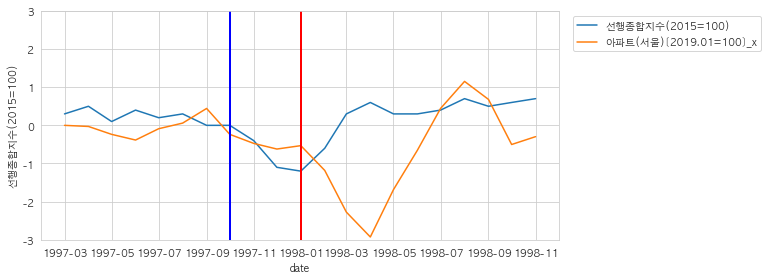

In [25]:
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = df_line.columns[:2]
y_ = df_line[(df_line.index > dt.datetime(1997, 1, 1)) & (df_line.index < dt.datetime(1998, 12, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.axvline(x=dt.datetime(1997, 10, 1), color='b', linewidth=2)
plt.axvline(x=dt.datetime(1998, 1, 1), color='r', linewidth=2)
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.4, 1))
plt.show()

<AxesSubplot:xlabel='date', ylabel='아파트(서울)[2019.01=100]_x'>

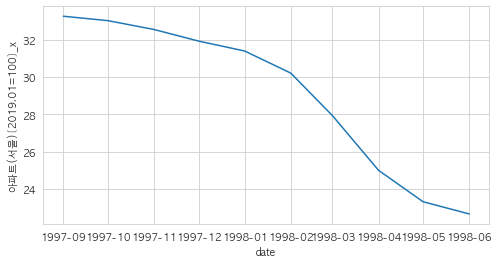

In [26]:
y_ = df_line[(df_line.index > dt.datetime(1997, 8, 1)) & (df_line.index < dt.datetime(1998, 7, 1))]
fig = plt.figure(figsize=(8,4))

sns.lineplot(x='date', y=y_['아파트(서울)[2019.01=100]_x'], data=df_line)
# plt.show()

- 98년 이후 3년간 아파트 전세지수

<AxesSubplot:xlabel='date', ylabel='아파트(서울)[2019.01=100]_x'>

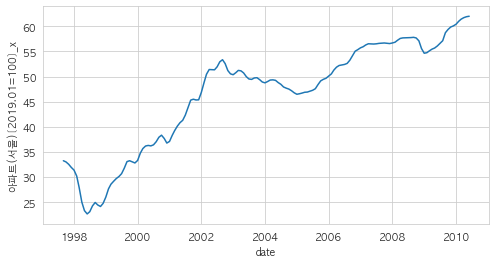

In [27]:
y_ = df_line[(df_line.index > dt.datetime(1997, 8, 1)) & (df_line.index < dt.datetime(2010, 7, 1))]
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

sns.lineplot(x='date', y=y_['아파트(서울)[2019.01=100]_x'], data=df_line)

### 2000년 11월

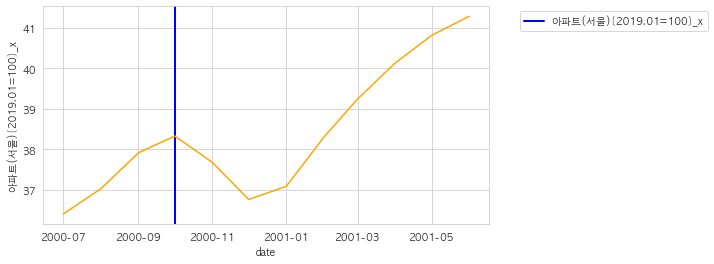

In [28]:
y_ = df_line[(df_line.index > dt.datetime(2000, 6, 1)) & (df_line.index < dt.datetime(2001, 7, 1))]
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.axvline(x=dt.datetime(2000, 10, 1), color='b', linewidth=2)
sns.lineplot(x='date', y=y_['아파트(서울)[2019.01=100]_x'], data=df_line, color='orange')
labels = ['아파트(서울)[2019.01=100]_x']
plt.legend(labels=labels, bbox_to_anchor=(1.5, 1))

plt.show()

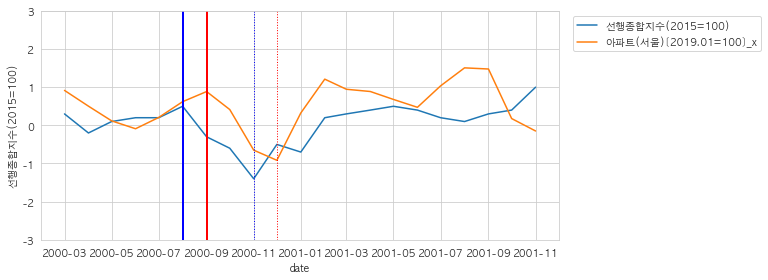

In [29]:
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(2000, 1, 1)) & (df_line.index < dt.datetime(2001, 12, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.axvline(x=dt.datetime(2000, 8, 1), color='b', linewidth=2)
plt.axvline(x=dt.datetime(2000, 11, 1), color='b', linewidth=1, linestyle=":")
plt.axvline(x=dt.datetime(2000, 9, 1), color='r', linewidth=2)
plt.axvline(x=dt.datetime(2000, 12, 1), color='r', linewidth=1, linestyle=":")
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.4, 1))
plt.show()

### 2002년 11월

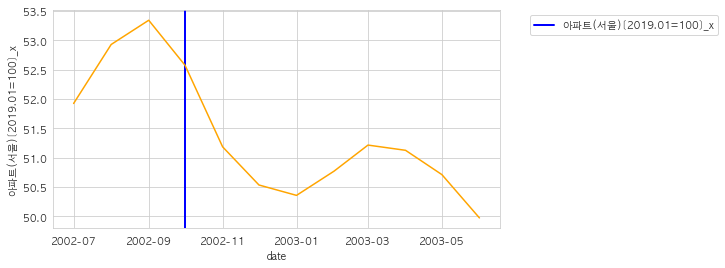

In [98]:
y_ = df_line[(df_line.index > dt.datetime(2002, 6, 1)) & (df_line.index < dt.datetime(2003, 7, 1))]
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.axvline(x=dt.datetime(2002, 10, 1), color='b', linewidth=2)
sns.lineplot(x='date', y=y_['아파트(서울)[2019.01=100]_x'], data=df_line, color='orange')
labels = ['아파트(서울)[2019.01=100]_x']
plt.legend(labels=labels, bbox_to_anchor=(1.5, 1))

plt.show()

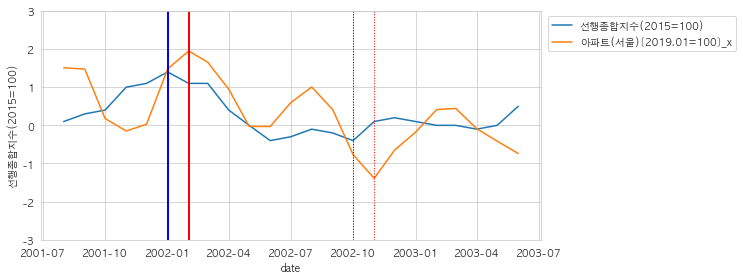

In [31]:
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(2001, 6, 1)) & (df_line.index < dt.datetime(2003, 7, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.axvline(x=dt.datetime(2002, 1, 1), color='b', linewidth=2)
plt.axvline(x=dt.datetime(2002, 10, 1), color='b', linewidth=1, linestyle=":")
plt.axvline(x=dt.datetime(2002, 2, 1), color='r', linewidth=2)
plt.axvline(x=dt.datetime(2002, 11, 1), color='r', linewidth=1, linestyle=":")
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.4, 1))
plt.show()

## 선행지수 상승 사례

In [36]:
df_line_diff[df_line_diff['선행종합지수(2015=100)'] > 1]

,선행종합지수(2015=100),아파트(서울)[2019.01=100]_x,아파트[2019.01=100]_x,총지수[2019.01=100]_x,광주[2017.11=100],연립주택[2019.01=100]_x,총지수(서울)[2019.01=100]_x,지방광역시[2017.11=100],아파트[2019.01=100]_y,전국[2017.11=100]
date,,,,,,,,,,
1999-02-01,1.1,1.655,1.369,1.050,NaN,1.099,1.169,NaN,0.309,NaN
1999-06-01,1.1,0.414,0.436,0.252,NaN,0.287,0.389,NaN,0.232,NaN
2001-12-01,1.1,0.029,0.249,0.168,NaN,-0.239,-0.039,NaN,0.541,NaN
2002-01-01,1.4,1.478,1.400,1.177,NaN,0.669,1.091,NaN,1.854,NaN
2002-02-01,1.1,1.950,1.711,1.596,NaN,1.528,1.870,NaN,1.660,NaN
2002-03-01,1.1,1.655,1.306,1.302,NaN,1.147,1.637,NaN,1.507,NaN
2009-04-01,1.2,0.344,0.149,0.110,-0.2,0.082,0.250,0.3,0.036,1.1


### 1998년 4월

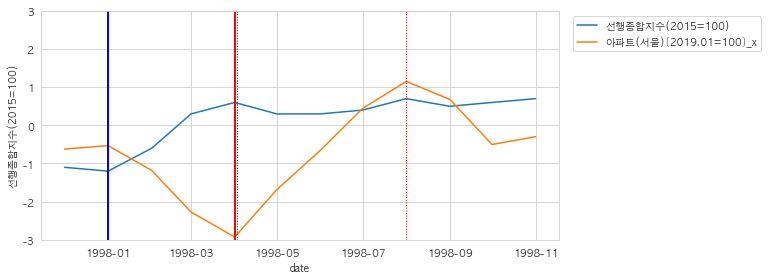

In [43]:
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(1997,10, 1)) & (df_line.index < dt.datetime(1998, 12, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.axvline(x=dt.datetime(1998, 1, 1), color='b', linewidth=2)
plt.axvline(x=dt.datetime(1998, 4, 3), color='b', linewidth=1, linestyle=":")
plt.axvline(x=dt.datetime(1998, 4, 1), color='r', linewidth=2)
plt.axvline(x=dt.datetime(1998, 8, 1), color='r', linewidth=1, linestyle=":")
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.4, 1))
plt.show()

### 2001년 12월

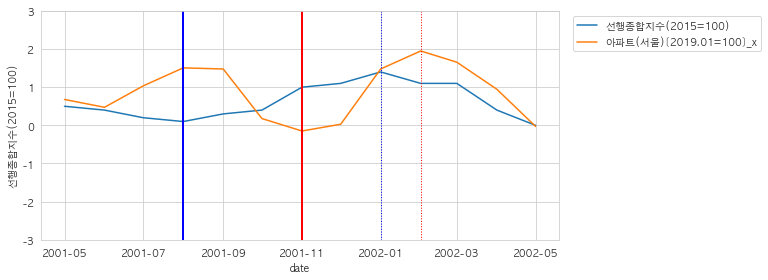

In [54]:
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(2001, 3, 1)) & (df_line.index < dt.datetime(2002, 6, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.axvline(x=dt.datetime(2001, 8, 1), color='b', linewidth=2)
plt.axvline(x=dt.datetime(2002, 1, 1), color='b', linewidth=1, linestyle=":")
plt.axvline(x=dt.datetime(2001, 11, 1), color='r', linewidth=2)
plt.axvline(x=dt.datetime(2002, 2, 1), color='r', linewidth=1, linestyle=":")
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.4, 1))
plt.show()

### 2009년 4월

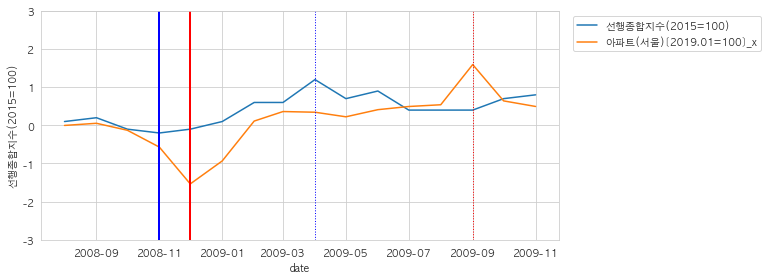

In [58]:
fig = plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(2008, 6, 1)) & (df_line.index < dt.datetime(2009, 12, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.axvline(x=dt.datetime(2008, 11, 1), color='b', linewidth=2)
plt.axvline(x=dt.datetime(2009, 4, 1), color='b', linewidth=1, linestyle=":")
plt.axvline(x=dt.datetime(2008, 12, 1), color='r', linewidth=2)
plt.axvline(x=dt.datetime(2009, 9, 1), color='r', linewidth=1, linestyle=":")
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.4, 1))
plt.show()

## 현재는?

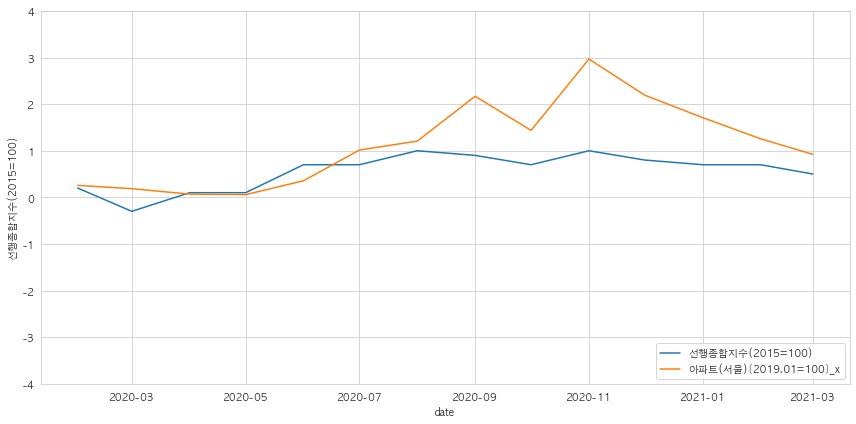

In [180]:
fig = plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(2019, 12, 1)) & (df_line.index < dt.datetime(2021, 4, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-4, 4])
# plt.axvline(x=dt.datetime(2008, 11, 1), color='b', linewidth=2)
# plt.axvline(x=dt.datetime(2009, 4, 1), color='b', linewidth=1, linestyle=":")
# plt.axvline(x=dt.datetime(2008, 12, 1), color='r', linewidth=2)
# plt.axvline(x=dt.datetime(2009, 9, 1), color='r', linewidth=1, linestyle=":")
plt.tight_layout()
plt.legend(labels=labels, loc='lower right')
plt.show()

### Time-Series

In [68]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

df_tseries = pd.DataFrame(df_corr_merge[df_corr_merge.index > dt.datetime(1999,12, 1)], columns=li_pos)

print(df_tseries.shape)
df_tseries.head(3)

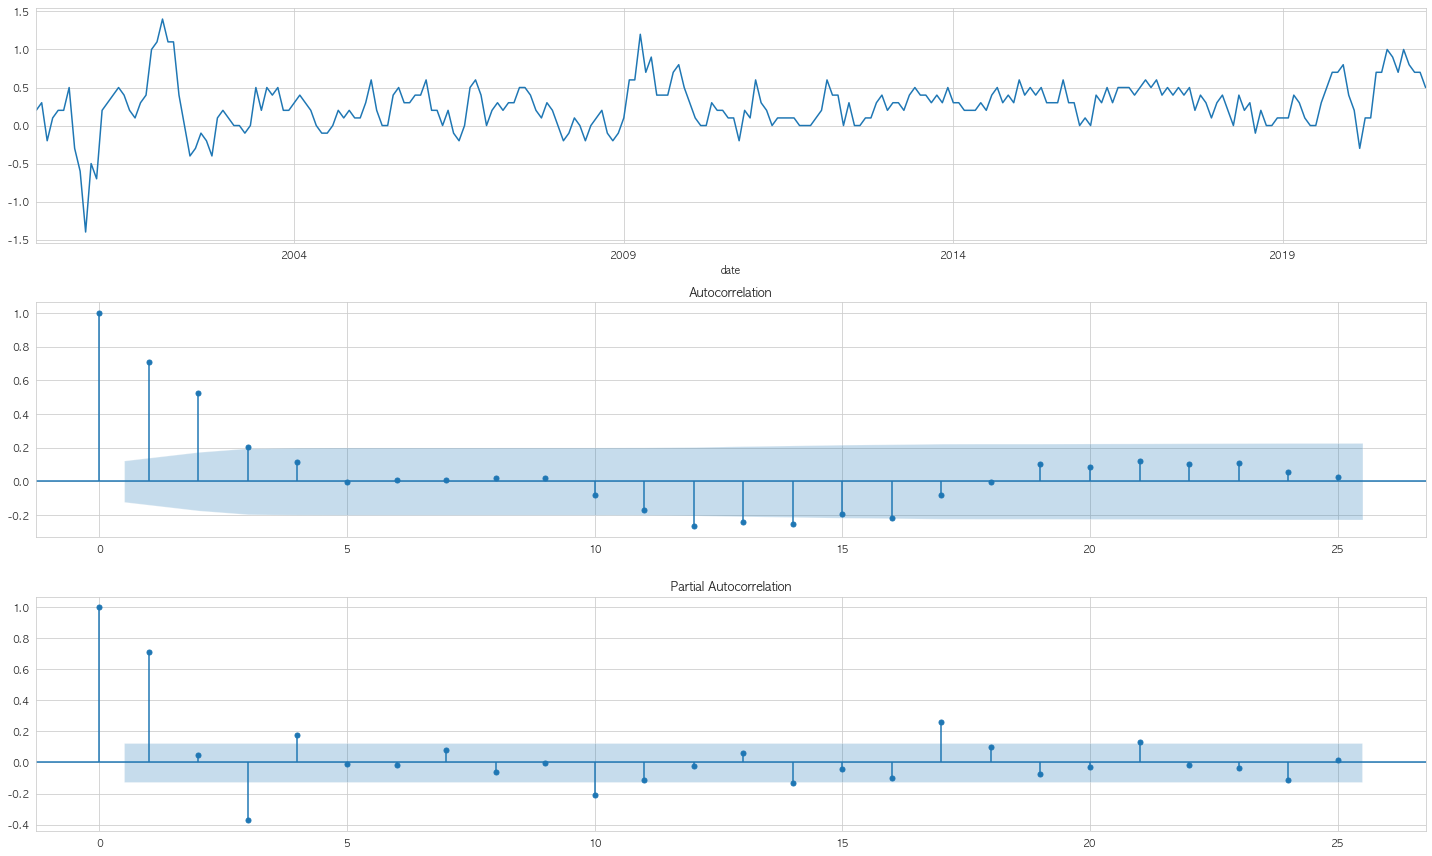

In [73]:
fig, ax = plt.subplots(3, 1, figsize=(20,12))

diff_1=df_tseries['선행종합지수(2015=100)'].diff(periods=1).iloc[1:]
diff_1.plot(ax=ax[0])
plot_acf(diff_1, ax=ax[1])
plot_pacf(diff_1, ax=ax[2])

plt.tight_layout()
plt.show()

In [77]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_tseries['선행종합지수(2015=100)'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-0.111, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-7.334, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-5.066, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-16.012, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-45.921, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-47.618, Time=0.08 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-47.635, Time=0.09 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=-69.072, Time=0.37 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-71.046, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-65.440, Time=0.25 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-69.063, Time=0.51 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-69.671, Time=0.31 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-66.579, Time=0.

In [119]:
# ARIMA 모델을 학습
model = ARIMA(df_tseries['선행종합지수(2015=100)'].values, order=(4,2,1))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  253
Model:                 ARIMA(4, 2, 1)   Log Likelihood                  41.523
Method:                       css-mle   S.D. of innovations              0.204
Date:                Thu, 20 May 2021   AIC                            -71.046
Time:                        18:32:50   BIC                            -49.846
Sample:                             2   HQIC                           -62.517
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y     0.7491      0.063     11.953      0.000       0.626       0.872
ar.L2.D2.y     0.2458      0.071      3.449      0.001       0.106       0.385
ar.L3.D2.y    -0.4905      0.072     -6.811      0.0

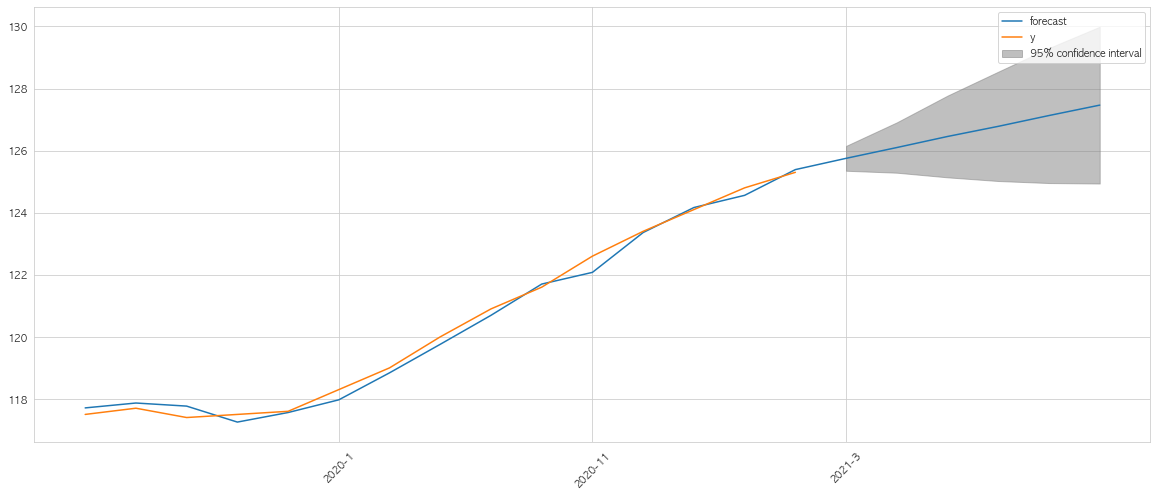

In [142]:
fig, ax = plt.subplots(figsize=(20, 8))
model_fit.plot_predict(240, 260, ax=ax)
plt.xticks([5, 10, 15], 
           [(str(df_tseries.iloc[240].name.year)+'-'+str(df_tseries.iloc[240].name.month)),
            (str(df_tseries.iloc[250].name.year)+'-'+str(df_tseries.iloc[250].name.month)),
            (str(df_tseries.iloc[254].name.year)+'-'+str(df_tseries.iloc[254].name.month))],
           rotation=45)
plt.show()

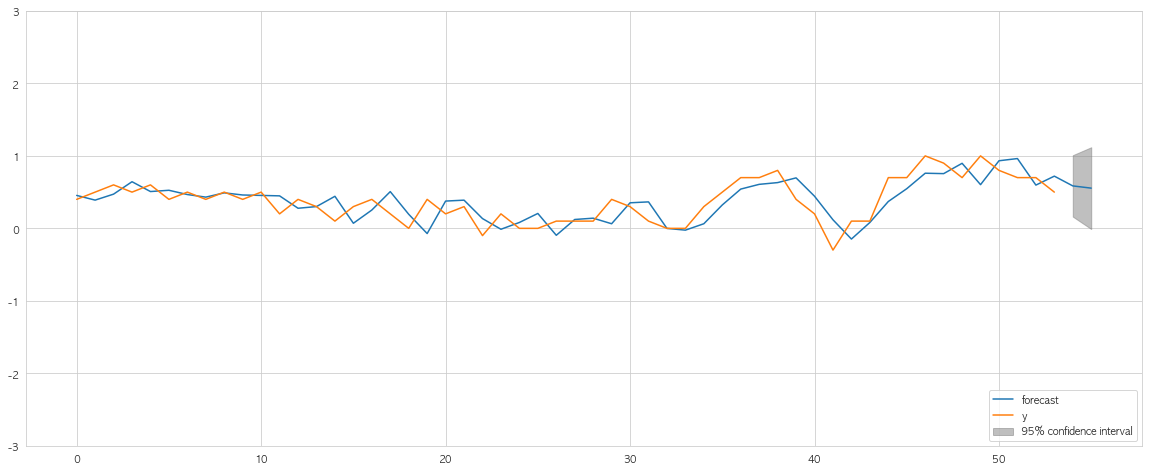

In [182]:
fig, ax = plt.subplots(figsize=(20, 8))
model_fit.plot_predict(200, 255, ax=ax)
plt.legend(loc='lower right')
plt.ylim([-3, 3])
plt.show()

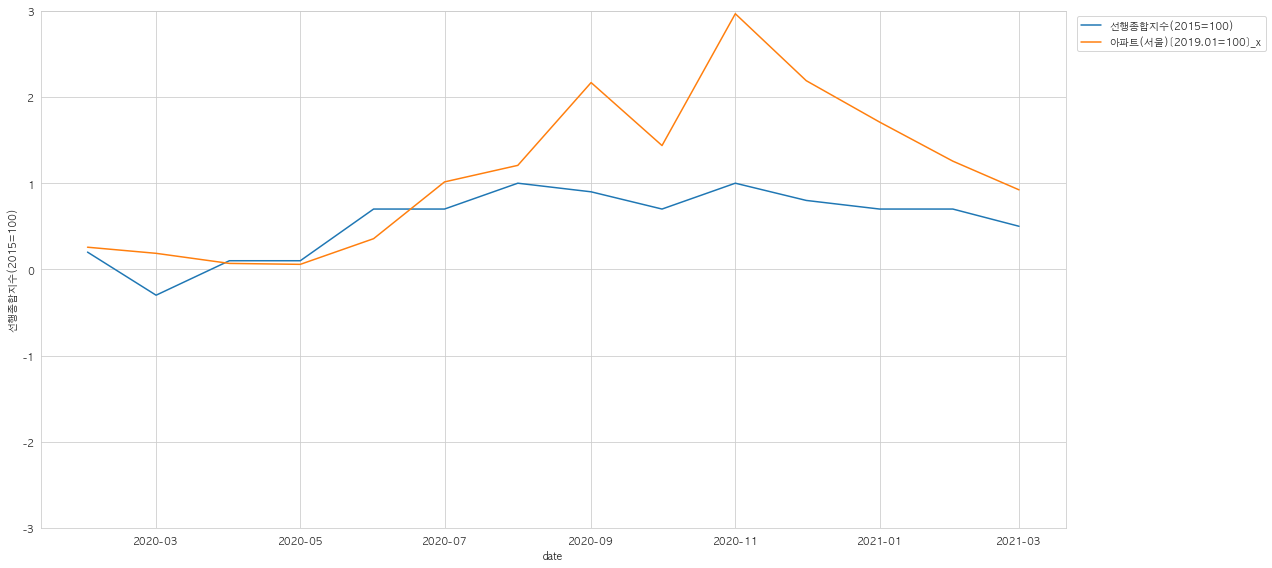

In [151]:
fig = plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
labels = ['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x']
y_ = df_line[(df_line.index > dt.datetime(2019, 12, 1)) & (df_line.index < dt.datetime(2021, 4, 1))].diff(periods=1)
for i in df_line.columns[:2]:
    sns.lineplot(x='date', y=y_[i], data=df_line)
plt.ylim([-3, 3])
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1.2, 1))
plt.show()

In [194]:
df_tseries2 = pd.DataFrame(df_corr_merge[df_corr_merge.index > dt.datetime(1999,12, 1)].diff(periods=1), columns=li_pos)

In [195]:
print(df_tseries2.shape)
df_tseries2.tail()

(255, 10)


,선행종합지수(2015=100),아파트(서울)[2019.01=100]_x,아파트[2019.01=100]_x,총지수[2019.01=100]_x,광주[2017.11=100],연립주택[2019.01=100]_x,총지수(서울)[2019.01=100]_x,지방광역시[2017.11=100],아파트[2019.01=100]_y,전국[2017.11=100]
date,,,,,,,,,,
2020-11-01,1.0,2.967,1.885,1.735,3.1,1.729,2.554,4.4,1.601,2.8
2020-12-01,0.8,2.190,1.468,1.157,1.7,0.700,1.635,4.2,1.840,3.2
2021-01-01,0.7,1.710,1.080,0.882,1.6,0.595,1.342,2.6,1.659,3.6
2021-02-01,0.7,1.256,0.963,0.805,NaN,0.653,1.043,NaN,1.952,NaN
2021-03-01,0.5,0.923,0.890,0.752,NaN,0.545,0.775,NaN,1.954,NaN


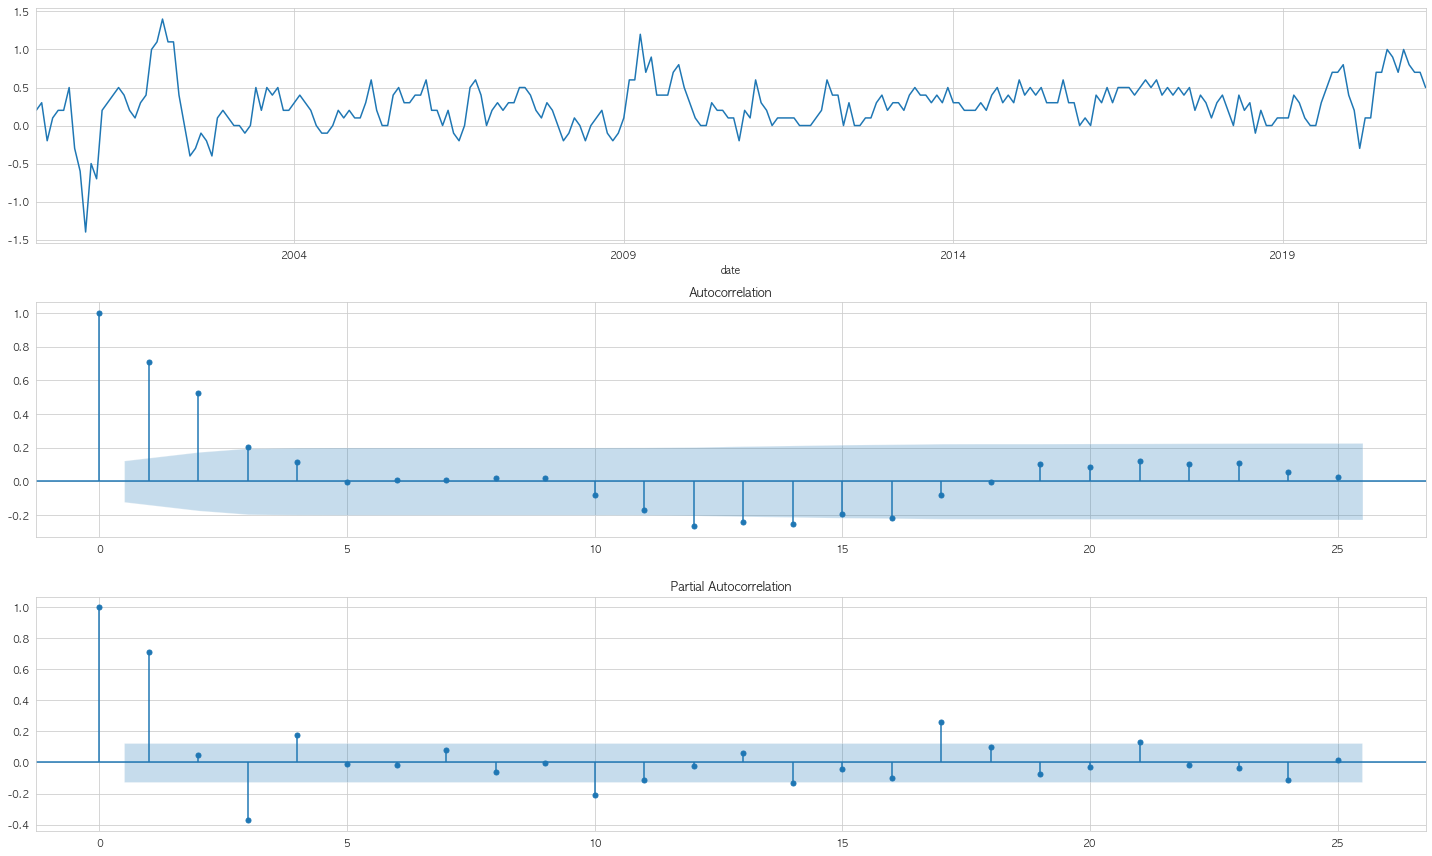

In [196]:
fig, ax = plt.subplots(3, 1, figsize=(20,12))

diff_1=df_tseries2['선행종합지수(2015=100)'].iloc[1:]
diff_1.plot(ax=ax[0])
plot_acf(diff_1, ax=ax[1])
plot_pacf(diff_1, ax=ax[2])

plt.tight_layout()
plt.show()

In [225]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_tseries2['선행종합지수(2015=100)'][1:], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-37.814, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1.882, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5.344, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3.077, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-0.111, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-30.402, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24.639, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20.879, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-68.264, Time=0.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-68.254, Time=0.60 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(

In [219]:
len(df_tseries2['선행종합지수(2015=100)'][1:])

254

In [224]:
# ARIMA 모델을 학습
model = ARIMA(df_tseries2['선행종합지수(2015=100)'][1:].values, order=(1,1,1))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  253
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  14.436
Method:                       css-mle   S.D. of innovations              0.228
Date:                Thu, 20 May 2021   AIC                            -22.872
Time:                        21:34:13   BIC                            -12.272
Sample:                             1   HQIC                           -18.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.8196      0.063    -13.064      0.000      -0.943      -0.697
ma.L1.D.y      0.6285      0.077      8.187      0.000       0.478       0.779
                                    Roots           

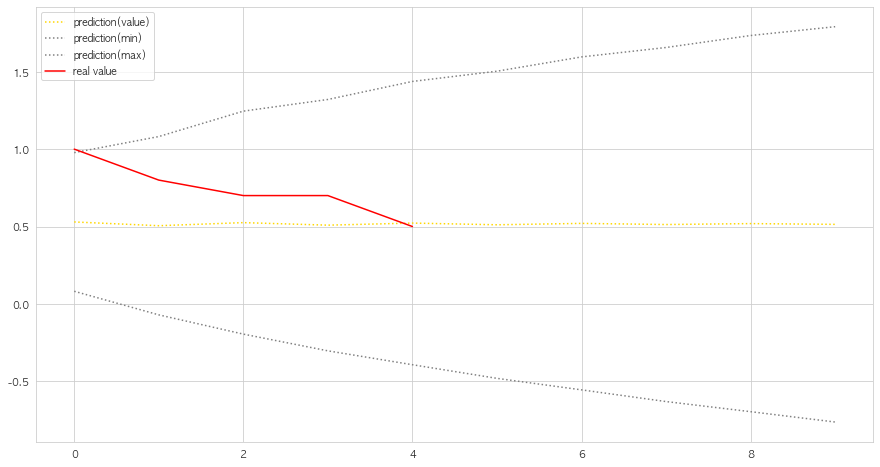

In [235]:
forecast_data = model_fit.forecast(steps=10) # 학습 데이터셋으로부터 5개월 뒤를 예측합니다.

df_test = df_tseries2.copy()

pred_y = forecast_data[0].tolist() 
test_y = df_test['선행종합지수(2015=100)'][-5:].values # 실제 5개월 데이터입니다. 
pred_y_lower = [] 
pred_y_upper = []
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

    
plt.figure(figsize=(15,8))

plt.plot(pred_y, color="gold", linestyle=':') 
plt.plot(pred_y_lower, color="gray", linestyle=':')
plt.plot(pred_y_upper, color="gray", linestyle=':') 
plt.plot(test_y, color="red") 

labels = ['prediction(value)', 'prediction(min)', 'prediction(max)', 'real value']
plt.legend(labels=labels, loc='upper left')
plt.show()